## Handwritten digit recognition using MNIST dataset to detect the scanned images of handwritten digits

In [38]:
# Importing necessary libraries:

# NumPy is imported for numerical operations and array handling.
import numpy as np

# %matplotlib inline is a magic command in Jupyter Notebook that ensures plots are displayed within the notebook.
%matplotlib inline

# Matplotlib.pyplot is imported for creating plots and visualizations.
import matplotlib.pyplot as plt

# TensorFlow is imported for deep learning capabilities.
import tensorflow

# Importing Keras, a high-level neural networks API that runs on top of TensorFlow.
from tensorflow import keras

# Creating a Sequential model for building neural networks.
from tensorflow.keras import Sequential

# Importing layers like Dense, Flatten, and Dropout for building the neural network architecture.
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Importing EarlyStopping callback from Keras for early stopping during training.
from keras.callbacks import EarlyStopping


In [39]:
# Importing Data:

from tensorflow.keras.datasets import mnist

In [3]:
# Splitting dataset into training and testing format:

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [40]:
# 60,000 images for training:

X_train.shape

(60000, 28, 28)

#### this indicates that there are 60,000 images in the dataset, and each image is 28 pixels in height and 28 pixels in width.

In [8]:
X_test.shape

(10000, 28, 28)

##### this indicates that there are 10,000 images in the dataset, and each image is 28 pixels in height and 28 pixels in width.

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
y_train.shape

(60000,)

In [11]:
y_test.shape

(10000,)

In [41]:
# Using suffling method for keeping randomness in image selection:

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
# X_train[shuffle_index] and y_train[shuffle_index] are used to rearrange the training data (images and labels)
# based on the random permutation generated above. This shuffling helps prevent the model from
# learning patterns based on the order of the data.

# After this operation, X_train and y_train will contain the same data as before but in a randomized order.

(-0.5, 27.5, 27.5, -0.5)

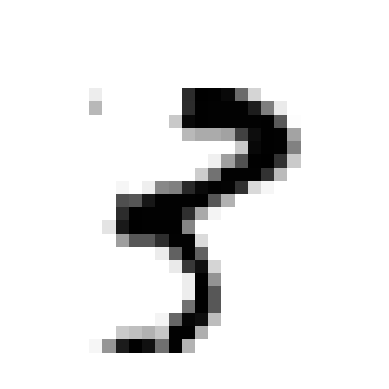

In [42]:
# Displaying image by using matplot:

plt.imshow(X_train[1000], cmap="binary")
plt.axis("off")

(-0.5, 27.5, 27.5, -0.5)

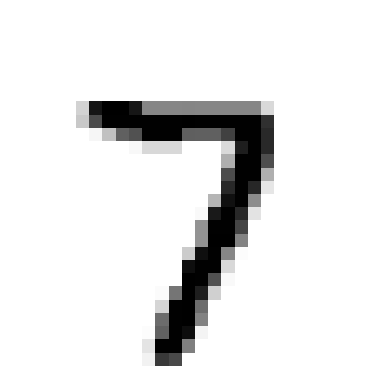

In [49]:
# Displaying image by using matplot:

plt.imshow(X_train[10083], cmap="binary")
plt.axis("off")

(-0.5, 27.5, 27.5, -0.5)

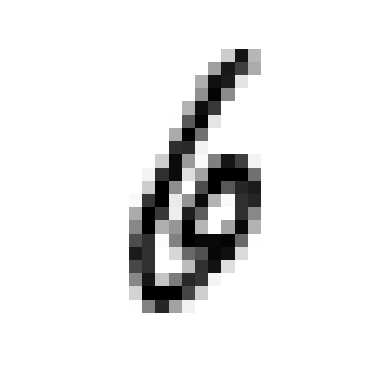

In [50]:
# Displaying random image by selecting:

plt.imshow(X_test[1908], cmap="binary")
plt.axis("off")

In [51]:
# Defining a function to display a grid of images with their corresponding labels:

def show_images(images, labels, label_header="True"):
    # Create a new figure for the grid of images.
    figure = plt.figure(figsize=(10, 10))

    # Specify the number of rows and columns in the grid.
    rows, cols = 5, 5

    # Iterate through the images and labels to display them.
    for i in range(1, rows * cols + 1):
        figure.add_subplot(rows, cols, i)  # Add a subplot to the figure.
        plt.axis(False)  # Turn off axis labels and ticks.
        plt.title(f"{label_header}: {labels[i-1].item()}")  # Set the title with label information.

        # Display the image using plt.imshow().
        # Note: .permute(1, 2, 0) is used to transpose the image dimensions from (C, H, W) to (H, W, C).
        plt.imshow(images[i-1].permute(1, 2, 0), cmap='gray')  # Display the image in grayscale.

    # Show the entire figure with the grid of images.
    plt.show()


In [52]:
# Importing necessary PyTorch and related libraries:

# PyTorch is imported for deep learning capabilities.
import torch

# torchvision is a package that provides access to popular datasets, model architectures, and image transformations.
import torchvision

# torch.nn is used for building neural network models.
from torch import nn

# torch.optim is used for optimization algorithms like SGD, Adam, etc.
import torch.optim as optim

# torchvision.transforms contains image transformation functions.
import torchvision.transforms as transforms

# Matplotlib.pyplot is imported for creating plots and visualizations.
import matplotlib.pyplot as plt

# tqdm is a library for displaying progress bars during loops.
from tqdm.notebook import tqdm



### Load the MNIST dataset

In [23]:
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 224032413.39it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 75006621.56it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 150077934.91it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 13147362.85it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



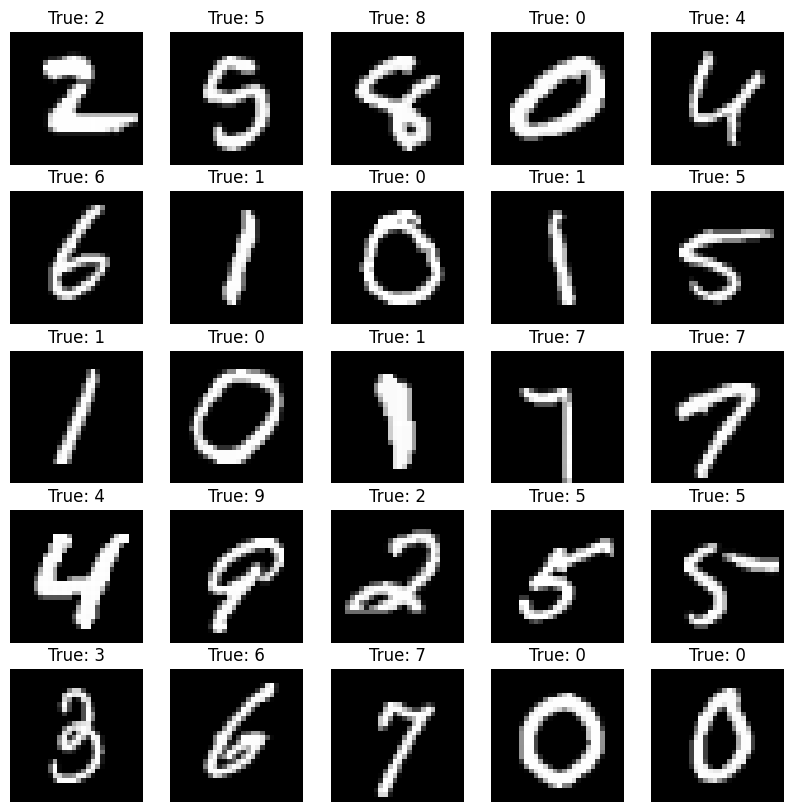

In [53]:
images, labels = next(iter(trainloader)) # Load a batch of images and labels.
show_images(images, labels) # Display the batch of images with their labels.

#### Define the CNN model

In [29]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )

        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 7 * 7, 128),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.conv(x)
        x = self.fc(x)

        return x

In [30]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#### Initialize the model, loss function, and optimizer

In [34]:
net = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.8)

#### Training the CNN

In [35]:
for epoch in range(5):
    running_loss = 0.0
    for idx, (inputs, labels) in tqdm(enumerate(trainloader), total=len(trainloader)):

        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch: {epoch + 1}, Loss: {running_loss / 100:.3f}')

print('Training Finished!')

  0%|          | 0/938 [00:00<?, ?it/s]

Epoch: 1, Loss: 12.555


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch: 2, Loss: 3.475


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch: 3, Loss: 2.774


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch: 4, Loss: 2.337


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch: 5, Loss: 1.974
Training Finished!


#### Evaluating the CNN on test data

In [36]:
correct = 0
total = 0
with torch.no_grad():
    for (images, labels) in testloader:

        images = images.to(device)
        labels = labels.to(device)

        outputs = net(images)
        predicted = outputs.argmax(1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on test set: {accuracy:.2f}%')

Accuracy on test set: 94.72%


#### Test on some images

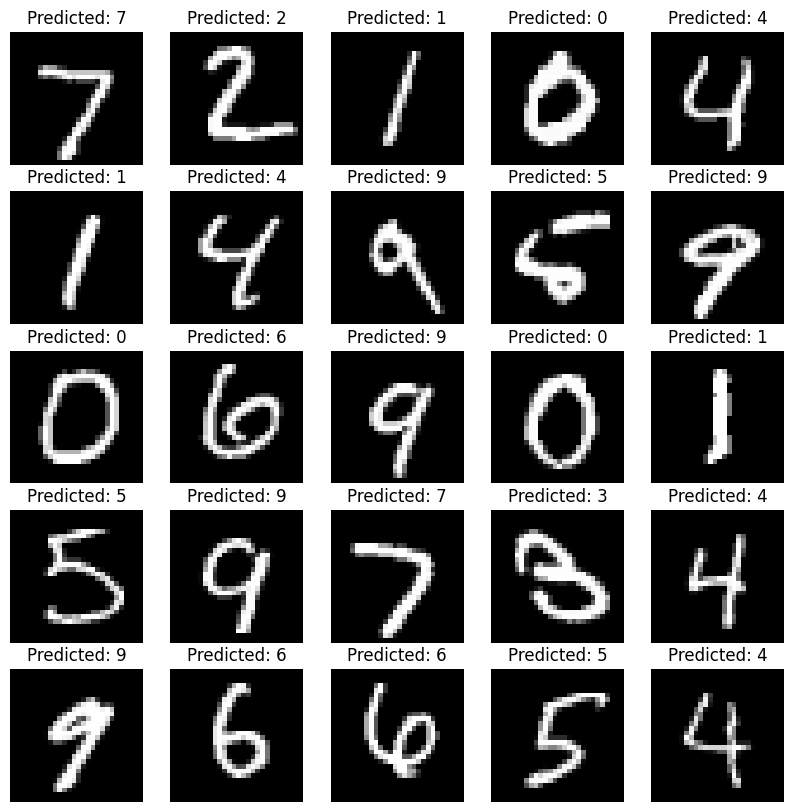

In [37]:
images, labels = next(iter(testloader))
with torch.no_grad():
    pred = net(images.to(device))
    pred = pred.argmax(1)
show_images(images, pred, "Predicted")